<a href="https://colab.research.google.com/github/crgraham/Tweet-time-series-analysis/blob/main/Times_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preliminaries: Fundamentals of time series analysis/forecasting

i. A time series is a series of data points indexed (or listed or graphed) in time order: ${X_t: t=0,...,n}$

ii. Common types of time series data include:
<ul>
<li>Meteorology: temperatures (low/high), precipitation, wind speed</li>
<li>Agriculture: crop/livestock production, soil erosion, exports</li>
<li>Biology: heart beats, blood pressure, EEG (electroencephalography)</li> 
<li>Economics/finance: evolution of interest rates, stock prices, prices, sales</li>
<li>Spoken language data</li>
</ul>

iii. Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. It entails:
<ul>
<li>exploratory analysis</li>
<li>auto-correlation analysis</li>
<li>curve fitting (regression)</li>
<li>decomposition</li>
</ul>

iv. Time series forecasting is the use of a model to predict future values based on previously observed values. It entails:
<ul>
<li>AR (Auto-Regressive), MA (Moving Average), ARIMA (Auto-Regressive Integrated Moving Average) modeling</li>
</ul>

v. These techniques differ from other statistical techniques in that:
- observations are assumed to be dependent
- the goal is to model dependence on time

vi. **Basic concepts:**

<ul>
<li>correlation: a statistical technique that can show whether and how strongly pairs of variables are related.</li>

<li>correlation coefficient: a statistical measure of the extent to which two factors vary together.</li>

$cor(X,Y) =\frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x\sigma_y} = \frac{cov(X, Y)}{\sigma_x\sigma_y}$ 

 ${X_t: t=0,...,n}, {Y_{t}: t=0,...,n}$

 <li>autocorrelation (AC): also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of the delay. AC is a very important concept in time series analysis. It is used: (1) to analyse the autocorrelation function before regression analysis and (2) to uncover hidden pattern in data - such as identifying seasonality (defined below). It can be derived from the following formula:</li>


$R_τ(X)=\frac{E[(X_t - μ)(X_t+τ - μ)]}{σ^2}$

 τ is the delay lag.


<li>stationarity: the statistical properties of a process (i.e., the mean, the variance and the covariance of the ith term and the i + m term should not be a function of time). This does not mean time series does not change over time, only that it assumes changes happen in a predictable way. Examples of techniques to calculate stationarity include: Random walk, Moving Average, Auto-Regressibe Integrated Moving Average (ARIMA). We can stationarise data through de-trending, differencing and logging - please consult the further resources links below for more on these concepts. We can use the Augmented Dickey Fuller test (ADF) to check if assumptions of stationarity are met or violated.</li>


<li> ADF: The null hypothesis is that the time series possesses a unit root and is non-stationary. So, if the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.</li>

<li>seasonality: repetitive and predictable movement around the trend line. This is usually based on the season (month, year, etc.). We use the autocorrelation function (ACF) to identify seasonality. </li>
</ul>
 
**Further resources**:

A more thorough introduction can be found in: 

Forecasting: Principles and Practice. R. J. Hyndman and G. Athanasopoulos. (https://otexts.com/fpp2/) 

Introduction to the Science of Statistics. Joseph C. Watkins. ( https://www.math.arizona.edu/~jwatkins/statbook.pdf) 





# 2. Aims of the study

In this study I will perform a time-series analysis of tweet data. My specific aims are:

<ol>
<li>to decompose the data into trend, seasonal component, and remainder.</li>

<li>to implement the auto-correlation function (ACF) to determine if the remainder is uncorrelated.</li>

<li>to determine whether the trend data is a stochastic/stationary process. To do this, I will rely on two tests: (1) the rolling mean statistic test and (2) the ACF scatter plot of the time-series against a 1-lagged version of itself.</li>

<li>to evaluate the quality of the model by examining the randomness of the remainder. A good model of the trend should lead to a remainder that is close to a normal random variable. There are multiple ways of checking the remainder, e.g., explicitly modelling its probability distribution, looking at its correlation structure, or using hypothesis tests. In this experiment I use a statistical test, the Augmented Dickey-Fuller (ADF) test to test the quality of the model.</li>
</ol>

**Reminder**: This data is a time-series of the number of tweets per second. The first column is the time(in seconds) and the second column is the number of tweets observed during this second

In [ ]:
#import packages
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

#import data
data =pd.read_csv("http://www.eecs.qmul.ac.uk/~linwang/download/ecs764//tweet-time-series", header=None, sep=" ")

#Here I sub-select 70000:269999
data = data.iloc[70000:270000, 1] 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 3. Time-series analysis




##3.1 Decomposition

Here I decompose the sequence into trend, seasonal component, and remainder/residual.

In [ ]:
result = seasonal_decompose(data, model="additive", freq=100) 
trend = result.trend
seasonal = result.seasonal
remainder = result.resid
#explore the decomposition
print(trend)
#trend
#print(seasonal)
#seasonal
#print(remainder)
#residual

70000    NaN
70001    NaN
70002    NaN
70003    NaN
70004    NaN
          ..
269995   NaN
269996   NaN
269997   NaN
269998   NaN
269999   NaN
Name: 1, Length: 200000, dtype: float64


<Figure size 432x288 with 0 Axes>

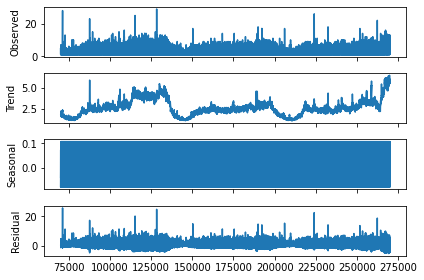

<Figure size 432x288 with 0 Axes>

In [ ]:
#Here I plot the results of the decomposition
result.plot()
plt.figure()

**Question 1**: What does the decompostition reveal about the time series, i.e, how can it best be described?

**Answer**: Based on the decomposition of the time-series, the model that best describes the times series is a trend plus random noise.

##3.2. Correlation analysis
The remainder component that results from the decomposition of the time-series should be uncorrelated, i.e., close to random noise. Here I examine whether this is the case based on the autocorrelation function (ACF: plot_acf())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9483932852745056, pvalue=0.0)


Text(0, 0.5, 'ACF')

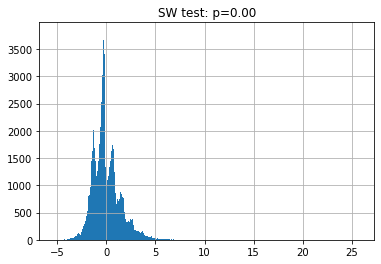

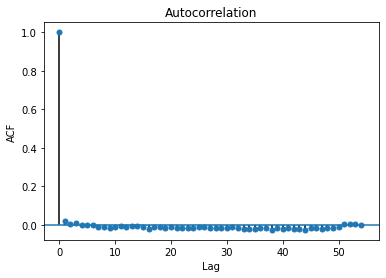

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
result = seasonal_decompose(data, model="additive", freq=100) 
# x is the remainder
x = result.resid

#Shapiro-Wilk (SW) test
import scipy.stats as sts
sw = sts.shapiro(x.dropna())
print(sw)

plt.figure()
x.hist(bins=1000)
plt.title('SW test: p=%.2f'%sw[1])
plot_acf(x.dropna())
plt.xlabel('Lag')
plt.ylabel('ACF')
#plot_pacf(x)





**Question**: Does the auto-correlation function indicate that the remainder is indeed uncorrelated with its lag?

**ANSWER**: The ACF plot here shows that they are indeed uncorrelated, with the values of the ACF being close to 0. The SW test also indicates that the null hypothesis is rejected - further confirming that the two models are not correlated. This confirms that the remainder is close to random noise.

##3.3. Stationarity analysis

This section examines whether the trend of the data is a stochastic process. We address this question using the scatter plot of the time-series against a 1-
lagged version of it and the rolling mean statistical technique.

###3.3.1. Scatter plot method

Note: 
>The data is already decomposed and stored in variable 'trend'

>We will need to create a lagged dataset

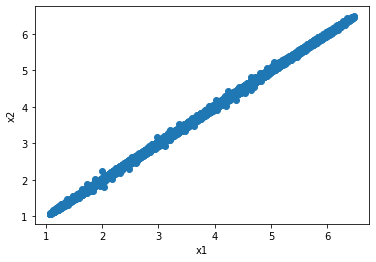

In [ ]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st

#name trend data1 - 'data' is already taken.
data1 = trend

#I create 1-lag using <.shift>
data2 = data1.shift(1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(data1, data2)
plt.show()



###3.3.2. Statistical method: Rolling mean analysis

This tests the stability of the model over time and examines whether the coefficients are time-invariant (i.e., stationary)

200000
70000          NaN
70001          NaN
70002          NaN
70003          NaN
70004          NaN
            ...   
269995    4.666667
269996    4.500000
269997    4.500000
269998    4.416667
269999    4.750000
Name: 1, Length: 200000, dtype: float64
199989


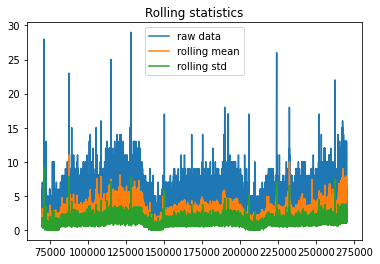

In [ ]:

#  plot rolling statistics 
rolling_mean = data.rolling(window=12).mean()
rolling_std = data.rolling(window=12).std()
plt.plot(data, label = 'raw data')
plt.plot(rolling_mean, label = 'rolling mean')
plt.plot(rolling_std, label = 'rolling std')
plt.title('Rolling statistics')
plt.legend()
print(data.size)
print(rolling_mean)
x2 = data -rolling_mean
x3 = x2.dropna()
print(x3.size)





**Question**: Is the trend of the data a stochastic process?

**Answer**: The 1-lagged scatterplot of the trend data is basically diagonal, which suggests that it is not stochastic/stationary. This is also confirmed by the rolling mean test.



#3.4. Evalution of model quality

One way of judging the quality of a model is through the randomness of the remainder. A good model of the trend should lead to a remainder that is close to a normal random variable. There are multiple ways of checking the remainder, e.g., explicitly modelling its probability distribution, looking
at its correlation structure, or using hypothesis tests. In this study we use an ADF test to evaluate the model.

In [ ]:
x = remainder
x1 = x.dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(x1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
p0 = result[1]


ADF Statistic: -81.529688
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


**Question**: Is the remainder stationary or does it change as a function of time? 

**Answer**: The result of the ADF test confirms that the remainder is stationary (as seen in the significantly low p-value). This confirms (what we also saw from the analysis of of the autocorrelation function in 3.2) that remainder is uncorrelated. This is what we would expect because after decomposition where information was extracted to compute the trend/forecast. If it were non-atinary it would mean that there is still useful information remaning and the decomposition process is not complere. From this I conclude that the remainder is essentially close to a random process.

